<a href="https://colab.research.google.com/github/ishank296/python_for_finance/blob/main/001_simple_and_log_returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 5.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb

In [3]:
PG = wb.DataReader('PG','yahoo',start='2020-01-01')

In [4]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,124.730003,122.940002,124.500000,123.410004,8130800.0,116.851509
2020-01-03,123.529999,121.860001,122.160004,122.580002,7970500.0,116.065605
2020-01-06,123.190002,122.379997,122.570000,122.750000,6674400.0,116.226578
2020-01-07,123.209999,121.870003,122.879997,121.989998,7583400.0,115.506973
2020-01-08,123.430000,122.000000,122.190002,122.510002,5385100.0,115.999329


In [5]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-29,156.470001,154.020004,155.369995,155.460007,5643400.0,155.460007
2022-03-30,154.429993,151.940002,152.500000,154.389999,5779300.0,154.389999
2022-03-31,154.339996,152.399994,154.100006,152.800003,7538600.0,152.800003
2022-04-01,155.460007,152.059998,153.520004,155.089996,5742600.0,155.089996
2022-04-01,155.460007,152.076797,153.520004,155.089996,5742629.0,155.089996


In [6]:
PG.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

**SIMPLE RETURNS = P1/P0 -1**

In [7]:
PG['simple_returns'] = (PG['Adj Close']/PG['Adj Close'].shift(1)) - 1

In [8]:
PG['simple_returns'].head()

Date
2020-01-02         NaN
2020-01-03   -0.006726
2020-01-06    0.001387
2020-01-07   -0.006191
2020-01-08    0.004263
Name: simple_returns, dtype: float64

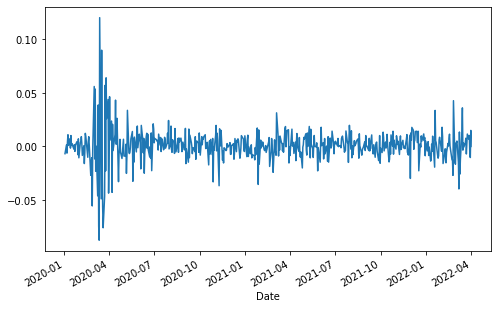

In [9]:
PG['simple_returns'].plot(figsize=(8,5))

In [10]:
avg_returns_d = PG['simple_returns'].mean()
avg_returns_d

0.000619732168320764

In [11]:
avg_returns_a = PG['simple_returns'].mean() * 250
print(str(round(avg_returns_a,4)*100) + "%")

15.49%


**Log Return = In(P1/P0)**

In [12]:
PG['log_returns'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG['log_returns']

Date
2020-01-02         NaN
2020-01-03   -0.006748
2020-01-06    0.001386
2020-01-07   -0.006211
2020-01-08    0.004254
                ...   
2022-03-29    0.010215
2022-03-30   -0.006907
2022-03-31   -0.010352
2022-04-01    0.014876
2022-04-01    0.000000
Name: log_returns, Length: 569, dtype: float64

In [13]:
log_returns_d = PG['log_returns'].mean()

In [14]:
log_returns_a = log_returns_d* 250
print(str(round(log_returns_a,4)* 100) + "%")

12.46%


**Calcualting Rate of return of Portfolio**
 Total sum of (rate of return for a security * weight in portfolio)


In [15]:
tickers = ['PG','MSFT','GE','F']
mydata = pd.DataFrame()
for i in tickers:
  mydata[i] = wb.DataReader(i,'yahoo',start = '2020-1-1')['Adj Close']

In [16]:
mydata.head()

,PG,MSFT,GE,F
Date,,,,
2020-01-02,116.851509,157.289871,94.574493,9.168928
2020-01-03,116.065613,155.331360,94.891586,8.964526
2020-01-06,116.226585,155.732834,96.239250,8.915858
2020-01-07,115.506966,154.312912,95.525795,9.003460
2020-01-08,115.999336,156.770874,94.653770,9.003460


**Normalization to 100:** P1/P0 * 100

In [17]:
mydata.iloc[0]

PG      116.851509
MSFT    157.289871
GE       94.574493
F         9.168928
Name: 2020-01-02 00:00:00, dtype: float64

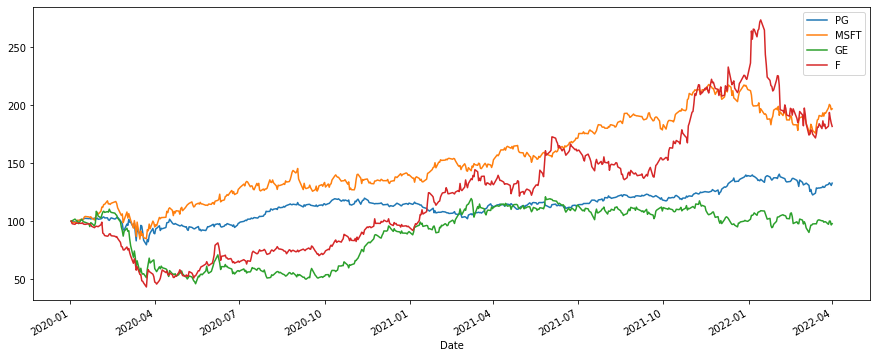

In [18]:
(mydata/mydata.iloc[0] * 100).plot(figsize=(15,6))

## **Calculating return of Portfolio of Securities**

In [19]:
simple_returns = (mydata/mydata.shift(1)) -1
simple_returns.head()

,PG,MSFT,GE,F
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.006726,-0.012452,0.003353,-0.022293
2020-01-06,0.001387,0.002585,0.014202,-0.005429
2020-01-07,-0.006192,-0.009118,-0.007413,0.009825
2020-01-08,0.004263,0.015928,-0.009129,0.000000


In [20]:
weights = np.array([.25,.25,.25,.25])
#np.dot(simple_returns,weights)
annual_returns = simple_returns.mean() * 250
annual_returns

PG      0.154933
MSFT    0.355983
GE      0.107166
F       0.387031
dtype: float64

In [21]:
np.dot(annual_returns,weights)

0.25127825611088317

In [22]:
portfolio_1=str(round(np.dot(annual_returns,weights),3) * 100) + '%'
print(portfolio_1)

25.1%


In [23]:
weights_2 = np.array([.3,.5,0.15,.05])
portfolio_2 = str(round(np.dot(annual_returns,weights_2),3)*100) + "%"
print(portfolio_2)

26.0%


**Calculating the Return of the Indices**

In [24]:
ind_data = pd.DataFrame()
tickers = ['^IXIC','^GSPC','^AXJO']
for i in tickers:
  ind_data[i] = wb.DataReader(i,'yahoo',start = '2020-1-1')['Adj Close']
ind_data.head()

,^IXIC,^GSPC,^AXJO
Date,,,
2020-01-02,9092.190430,3257.850098,6733.500000
2020-01-03,9020.769531,3234.850098,NaN
2020-01-06,9071.469727,3246.280029,6826.399902
2020-01-07,9068.580078,3237.179932,6817.600098
2020-01-08,9129.240234,3253.050049,6874.200195


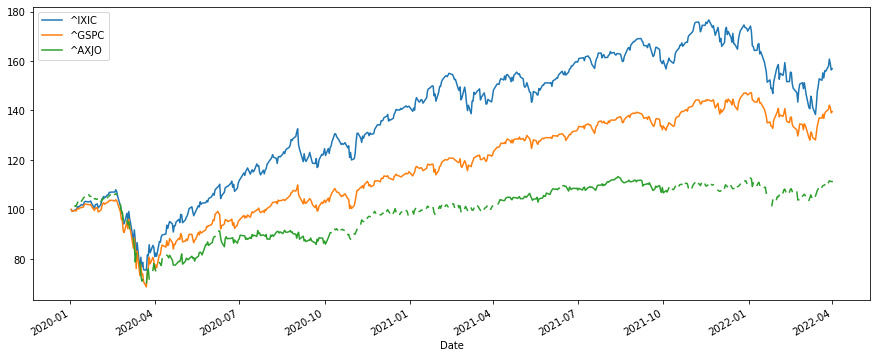

In [25]:
((ind_data/ind_data.iloc[0]) * 100).plot(figsize=(15,6))

In [26]:
ind_simple_returns = (ind_data/ind_data.shift(1)) -1
ind_simple_returns.mean() * 250

^IXIC    0.238639
^GSPC    0.179262
^AXJO    0.000534
dtype: float64

**Compare rate of returns for stocks and stock indices**

In [28]:
tickers = ['PG','^IXIC']
data_2 = pd.DataFrame()
for t in tickers:
  data_2[t] = wb.DataReader(t,'yahoo',start='2020-1-1')['Adj Close']
data_2.head()

,PG,^IXIC
Date,,
2020-01-02,116.851501,9092.190430
2020-01-03,116.065605,9020.769531
2020-01-06,116.226585,9071.469727
2020-01-07,115.506966,9068.580078
2020-01-08,115.999336,9129.240234


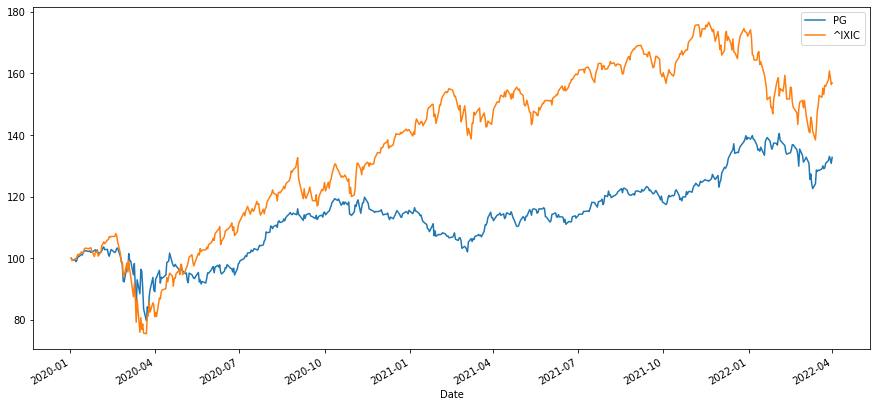

In [30]:
(data_2/data_2.iloc[0] * 100).plot(figsize=(15,7))